In [8]:
from dataloader import PoseDataLoader

import json 

data_path  = './data/train_data_20.json'
val_data = './data/val_data_20.json'


dl = PoseDataLoader(data_path,val_data)

2025-04-01 04:24:34,470 - INFO - Loaded 71855 samples from ./data/train_data_20.json
2025-04-01 04:24:35,267 - INFO - Loaded 15397 samples from ./data/val_data_20.json


In [12]:
dl.__getitem__(0)

{'kp_gt_flat': array([ 681.30657959,  976.98059082,  669.20281982,  921.60211182,
         671.27838135,  880.07495117,  698.92651367, 1010.56872559,
         700.04840088,  957.38800049,  735.63378906,  902.38269043,
         734.24066162,  900.41656494,  750.88964844, 1016.53753662,
         724.2958374 ,  935.75878906,  737.06219482,  904.39929199,
         751.32879639, 1028.39080811,  786.82873535,  932.88220215,
         683.79083252,  952.12713623,  722.79748535, 1020.45147705,
         765.78778076,  992.54052734,  775.06494141,  969.53881836,
         672.19390869,  947.48773193,  636.7543335 ,  939.29425049,
         663.40136719,  820.22302246,  664.09649658,  798.97717285,
         685.07904053,  992.66503906,  639.80230713,  892.56591797,
         662.71539307,  841.18884277,  688.99572754, 1004.05255127,
         653.60931396,  901.41381836,  663.20117188,  947.20465088,
         679.85400391, 1011.44842529,  668.49047852,  971.05548096,
         655.3527832 ,  949.914367

In [34]:
vm = dl.__getitem__(0)['vm']
kp2d = dl.__getitem__(0)['kp2d_camera']
kp3d = dl.__getitem__(0)['kp3d_world']

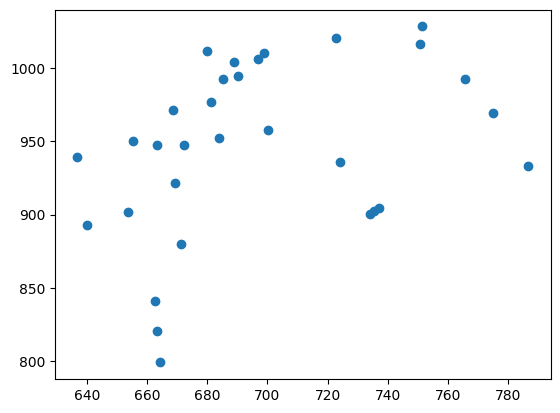

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(kp2d[:,0],kp2d[:,1])


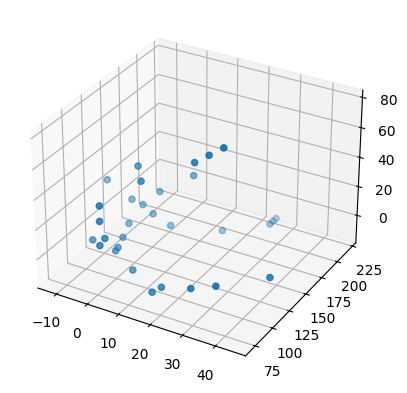

In [16]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(kp3d[:,0],kp3d[:,1],kp3d[:,2])
plt.show()

In [ ]:

def plot_2d_keypoints(data, joint_order):
    """
    Plot the 2D keypoints.
    Args:
        data: The data to plot.
        joint_order: The joint order.
    Returns:
        The plot.
    """
    conns = [('Head','Neck'),('Neck','Chest'),('Chest','LeftShoulder'),('LeftShoulder','LeftArm'),
             ('LeftArm','LeftForearm'),('LeftForearm','LeftHand'),('Chest','RightShoulder'),
             ('RightShoulder','RightArm'),('RightArm','RightForearm'),('RightForearm','RightHand'),
             ('Hips','LeftThigh'),('LeftThigh','LeftLeg'),('LeftLeg','LeftFoot'),
             ('Hips','RightThigh'),('RightThigh','RightLeg'),('RightLeg','RightFoot'),
             ('RightHand','RightFinger'),('RightFinger','RightFingerEnd'),
             ('LeftHand','LeftFinger'),('LeftFinger','LeftFingerEnd'),
             ('Head','HeadEnd'),('RightFoot','RightHeel'),('RightHeel','RightToe'),
             ('RightToe','RightToeEnd'),('LeftFoot','LeftHeel'),('LeftHeel','LeftToe'),
             ('LeftToe','LeftToeEnd'),('SpineLow','Hips'),('SpineMid','SpineLow'),
             ('Chest','SpineMid')]
    pts = np.array(data).reshape(len(joint_order), 2)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.scatter(pts[:,0], pts[:,1], c='red')
    for j1, j2 in conns:
        if j1 in joint_order and j2 in joint_order:
            i1, i2 = joint_order.index(j1), joint_order.index(j2)
            ax.plot([pts[i1,0], pts[i2,0]],[pts[i1,1], pts[i2,1]], c='blue')
    return fig

In [44]:
import pyquaternion
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

vm = dl.__getitem__(0)['vm']
kp2d = dl.__getitem__(0)['kp2d_camera']
kp3d = dl.__getitem__(0)['kp3d_world']
joint_order = dl.joint_order

print("2D Keypoints:", kp2d)
print("3D Keypoints:", kp3d)
print("Joint Order:", joint_order)
print("View Matrix:", vm)

2D Keypoints: [[ 681.30657959  976.98059082]
 [ 669.20281982  921.60211182]
 [ 671.27838135  880.07495117]
 [ 698.92651367 1010.56872559]
 [ 700.04840088  957.38800049]
 [ 735.63378906  902.38269043]
 [ 734.24066162  900.41656494]
 [ 750.88964844 1016.53753662]
 [ 724.2958374   935.75878906]
 [ 737.06219482  904.39929199]
 [ 751.32879639 1028.39080811]
 [ 786.82873535  932.88220215]
 [ 683.79083252  952.12713623]
 [ 722.79748535 1020.45147705]
 [ 765.78778076  992.54052734]
 [ 775.06494141  969.53881836]
 [ 672.19390869  947.48773193]
 [ 636.7543335   939.29425049]
 [ 663.40136719  820.22302246]
 [ 664.09649658  798.97717285]
 [ 685.07904053  992.66503906]
 [ 639.80230713  892.56591797]
 [ 662.71539307  841.18884277]
 [ 688.99572754 1004.05255127]
 [ 653.60931396  901.41381836]
 [ 663.20117188  947.20465088]
 [ 679.85400391 1011.44842529]
 [ 668.49047852  971.05548096]
 [ 655.3527832   949.91436768]
 [ 697.01611328 1006.34637451]
 [ 690.29290771  994.50091553]]
3D Keypoints: [[-3.26278

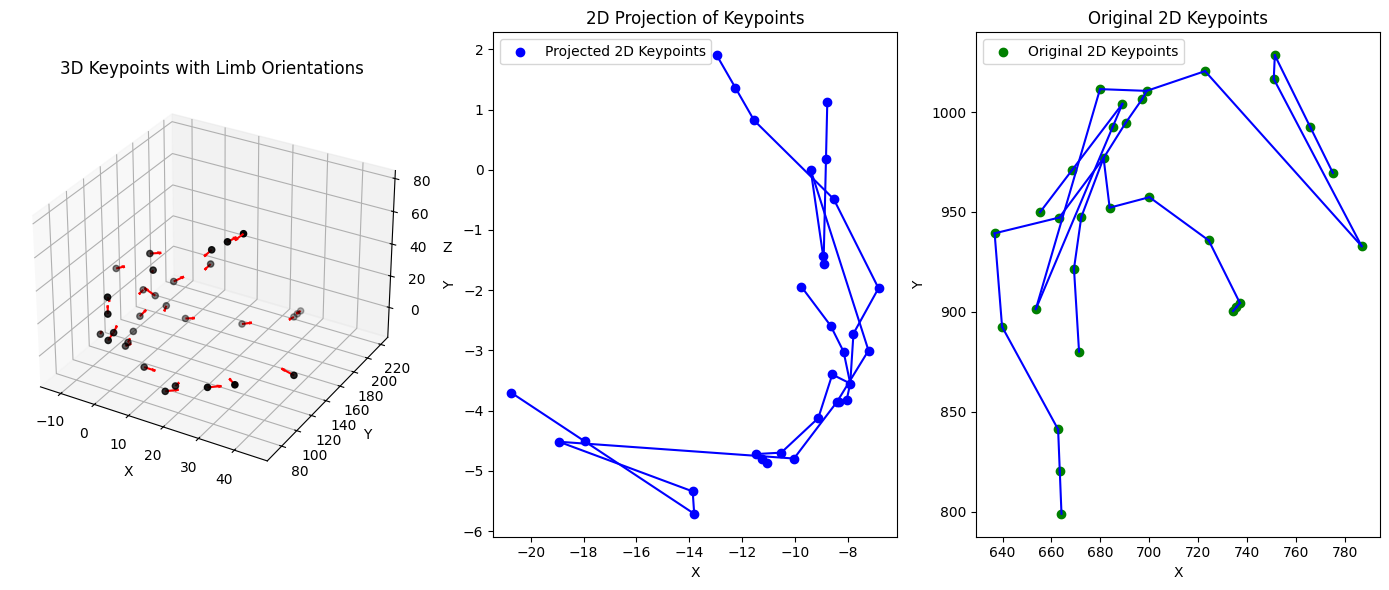

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pyquaternion import Quaternion

projection_matrix = np.array([ 2.790552 ,  0.,         0.,         0.,         0.,         1.5696855,
  0.,         0.,         0.,         0.,        -1.0001999, -1.,
  0.,         0.,        -0.20002,    0.,       ], dtype=np.float32)
# -------------------------------------------------------------------
# Helper function to compute the quaternion that rotates vector v0 to v1.
def quaternion_from_vectors(v0, v1):
    v0_norm = v0 / np.linalg.norm(v0)
    v1_norm = v1 / np.linalg.norm(v1)
    dot = np.dot(v0_norm, v1_norm)
    # If nearly identical, return the identity quaternion.
    if dot >= 0.9999:
        return Quaternion()
    # If nearly opposite, pick an arbitrary perpendicular axis.
    if dot <= -0.9999:
        orthog = np.array([1, 0, 0])
        if np.abs(v0_norm[0]) > 0.9:
            orthog = np.array([0, 1, 0])
        axis = np.cross(v0_norm, orthog)
        axis = axis / np.linalg.norm(axis)
        return Quaternion(axis=axis, angle=np.pi)
    axis = np.cross(v0_norm, v1_norm)
    angle = np.arccos(dot)
    return Quaternion(axis=axis, angle=angle)

# -------------------------------------------------------------------
# Compute limb quaternions from consecutive 3D keypoints.
# We assume a default limb direction of [0, 1, 0] (adjust if needed).
default_vector = np.array([0, 1, 0])
limb_quaternions = []
for i in range(len(kp3d) - 1):
    limb_vector = kp3d[i + 1] - kp3d[i]
    if np.linalg.norm(limb_vector) < 1e-6:
        q = Quaternion()  # Identity if the two points are nearly identical.
    else:
        q = quaternion_from_vectors(default_vector, limb_vector)
    limb_quaternions.append(q)

# -------------------------------------------------------------------
# Function to project 3D keypoints to 2D using the view and projection matrices.
def project_points(kp3d, vm, projection_matrix):
    num_points = kp3d.shape[0]
    # Convert projection_matrix (given as a flat array) into a 4x4 matrix.
    proj_mat = projection_matrix.reshape((4, 4))
    # Append homogeneous coordinate to the 3D points.
    kp3d_hom = np.hstack([kp3d, np.ones((num_points, 1))])
    # Transform into camera coordinates using the view matrix.
    cam_coords = (vm @ kp3d_hom.T).T
    # Project into clip space.
    proj_coords = (proj_mat @ cam_coords.T).T
    # Perform perspective division.
    proj_coords /= proj_coords[:, 3].reshape(-1, 1)
    # Return only the x and y coordinates.
    return proj_coords[:, :2]

# Project 3D keypoints into 2D.
proj_kp2d = project_points(kp3d, vm, projection_matrix)

# -------------------------------------------------------------------
# Visualization: create side-by-side plots.
fig = plt.figure(figsize=(14, 6))

# Left: 3D keypoints with limb orientation arrows.
ax3d = fig.add_subplot(131, projection='3d')
ax3d.scatter(kp3d[:, 0], kp3d[:, 1], kp3d[:, 2], color='k', label='3D Keypoints')
arrow_length = 5  # Adjust for your scene scale.
for i in range(len(kp3d) - 1):
    start_point = kp3d[i]
    q = limb_quaternions[i]
    # Rotate the default vector using the computed quaternion.
    rotated_dir = q.rotate(default_vector)
    ax3d.quiver(start_point[0], start_point[1], start_point[2],
                rotated_dir[0], rotated_dir[1], rotated_dir[2],
                length=arrow_length, color='r')
ax3d.set_title("3D Keypoints with Limb Orientations")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

# Right: 2D projection of keypoints.
ax2d = fig.add_subplot(132)
ax2d.scatter(proj_kp2d[:, 0], proj_kp2d[:, 1], color='b', label='Projected 2D Keypoints')
conns = [('Head','Neck'),('Neck','Chest'),('Chest','LeftShoulder'),('LeftShoulder','LeftArm'),
             ('LeftArm','LeftForearm'),('LeftForearm','LeftHand'),('Chest','RightShoulder'),
             ('RightShoulder','RightArm'),('RightArm','RightForearm'),('RightForearm','RightHand'),
             ('Hips','LeftThigh'),('LeftThigh','LeftLeg'),('LeftLeg','LeftFoot'),
             ('Hips','RightThigh'),('RightThigh','RightLeg'),('RightLeg','RightFoot'),
             ('RightHand','RightFinger'),('RightFinger','RightFingerEnd'),
             ('LeftHand','LeftFinger'),('LeftFinger','LeftFingerEnd'),
             ('Head','HeadEnd'),('RightFoot','RightHeel'),('RightHeel','RightToe'),
             ('RightToe','RightToeEnd'),('LeftFoot','LeftHeel'),('LeftHeel','LeftToe'),
             ('LeftToe','LeftToeEnd'),('SpineLow','Hips'),('SpineMid','SpineLow'),
             ('Chest','SpineMid')]
for j1, j2 in conns:
    if j1 in joint_order and j2 in joint_order:
        i1, i2 = joint_order.index(j1), joint_order.index(j2)
        ax2d.plot([proj_kp2d[i1, 0], proj_kp2d[i2, 0]], [proj_kp2d[i1, 1], proj_kp2d[i2, 1]], c='blue')
ax2d.set_title("2D Projection of Keypoints")
ax2d.set_xlabel("X")
ax2d.set_ylabel("Y")
ax2d.legend()

ax2d2 = fig.add_subplot(133)
ax2d2.scatter(kp2d[:, 0], kp2d[:, 1], color='g', label='Original 2D Keypoints')
for j1, j2 in conns:
    if j1 in joint_order and j2 in joint_order:
        i1, i2 = joint_order.index(j1), joint_order.index(j2)
        ax2d2.plot([kp2d[i1, 0], kp2d[i2, 0]], [kp2d[i1, 1], kp2d[i2, 1]], c='blue')
ax2d2.set_title("Original 2D Keypoints")
ax2d2.set_xlabel("X")
ax2d2.set_ylabel("Y")
ax2d2.legend()

plt.tight_layout()
plt.show()

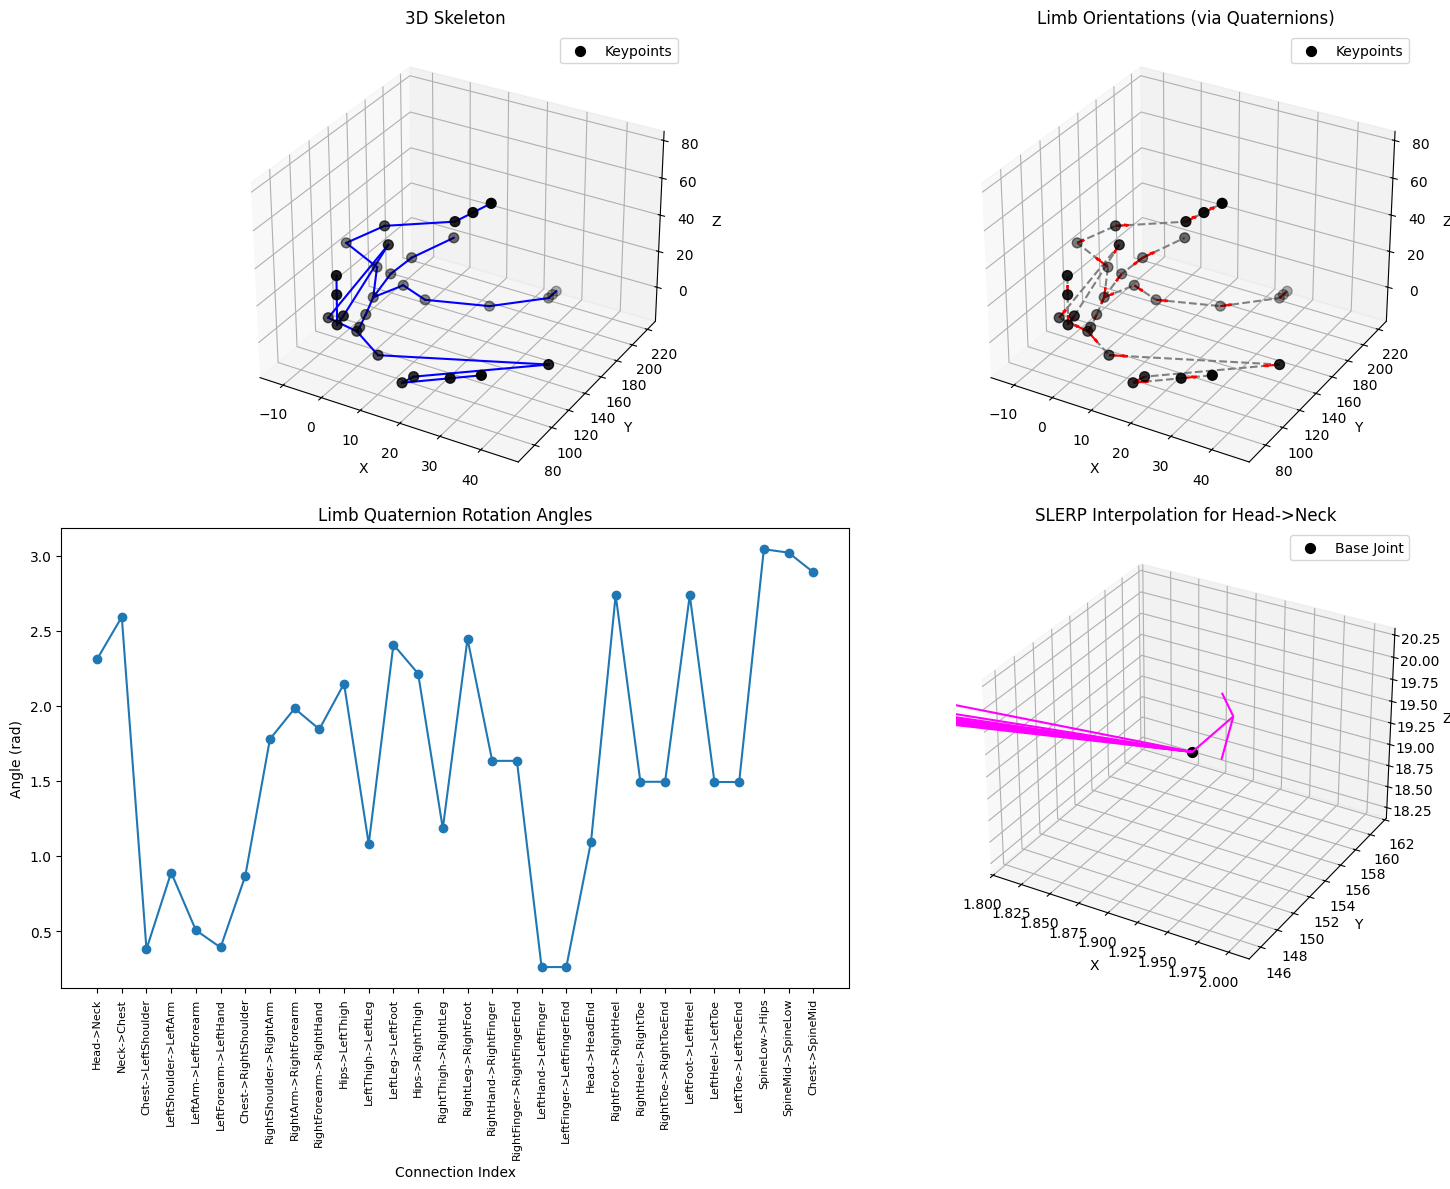

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pyquaternion import Quaternion


vm = dl.__getitem__(0)['vm']
kp2d = dl.__getitem__(0)['kp2d_camera']
kp3d = dl.__getitem__(0)['kp3d_world']
joint_order = dl.joint_order

# ----------------------------
# kp3d : (N, 3) array of 3D joint positions.
# joint_order : list of joint names in the same order as kp3d.
# For skeleton connectivity, we define a list of joint name pairs.
conns = [
    ('Head','Neck'), ('Neck','Chest'), ('Chest','LeftShoulder'), ('LeftShoulder','LeftArm'),
    ('LeftArm','LeftForearm'), ('LeftForearm','LeftHand'), ('Chest','RightShoulder'),
    ('RightShoulder','RightArm'), ('RightArm','RightForearm'), ('RightForearm','RightHand'),
    ('Hips','LeftThigh'), ('LeftThigh','LeftLeg'), ('LeftLeg','LeftFoot'),
    ('Hips','RightThigh'), ('RightThigh','RightLeg'), ('RightLeg','RightFoot'),
    ('RightHand','RightFinger'), ('RightFinger','RightFingerEnd'),
    ('LeftHand','LeftFinger'), ('LeftFinger','LeftFingerEnd'),
    ('Head','HeadEnd'), ('RightFoot','RightHeel'), ('RightHeel','RightToe'),
    ('RightToe','RightToeEnd'), ('LeftFoot','LeftHeel'), ('LeftHeel','LeftToe'),
    ('LeftToe','LeftToeEnd'), ('SpineLow','Hips'), ('SpineMid','SpineLow'),
    ('Chest','SpineMid')
]

# Default limb direction (a canonical direction for each limb)
default_vector = np.array([0, 1, 0])

# ----------------------------
# Helper function: Compute quaternion rotating v0 to v1.
def quaternion_from_vectors(v0, v1):
    v0_norm = v0 / np.linalg.norm(v0)
    v1_norm = v1 / np.linalg.norm(v1)
    dot = np.dot(v0_norm, v1_norm)
    # Nearly identical vectors: identity quaternion.
    if dot >= 0.9999:
        return Quaternion()
    # Nearly opposite: choose an arbitrary orthogonal axis.
    if dot <= -0.9999:
        orthog = np.array([1, 0, 0])
        if np.abs(v0_norm[0]) > 0.9:
            orthog = np.array([0, 1, 0])
        axis = np.cross(v0_norm, orthog)
        axis /= np.linalg.norm(axis)
        return Quaternion(axis=axis, angle=np.pi)
    axis = np.cross(v0_norm, v1_norm)
    angle = np.arccos(dot)
    return Quaternion(axis=axis, angle=angle)

# ----------------------------
# Compute limb quaternions for each connection in 'conns'
limb_quaternions = {}  # Dictionary with keys as (joint1, joint2)
for j1, j2 in conns:
    if j1 in joint_order and j2 in joint_order:
        i1, i2 = joint_order.index(j1), joint_order.index(j2)
        limb_vector = kp3d[i2] - kp3d[i1]
        if np.linalg.norm(limb_vector) < 1e-6:
            q = Quaternion()  # Identity if points are nearly the same.
        else:
            q = quaternion_from_vectors(default_vector, limb_vector)
        limb_quaternions[(j1, j2)] = q

# ----------------------------
# Create a figure with 4 subplots.
fig = plt.figure(figsize=(16, 12))

# Subplot 1: 3D Skeleton with connections.
ax1 = fig.add_subplot(221, projection='3d')
ax1.scatter(kp3d[:, 0], kp3d[:, 1], kp3d[:, 2], color='k', s=50, label='Keypoints')
for j1, j2 in conns:
    if j1 in joint_order and j2 in joint_order:
        i1, i2 = joint_order.index(j1), joint_order.index(j2)
        ax1.plot([kp3d[i1, 0], kp3d[i2, 0]],
                 [kp3d[i1, 1], kp3d[i2, 1]],
                 [kp3d[i1, 2], kp3d[i2, 2]], color='blue')
ax1.set_title("3D Skeleton")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
ax1.legend()

# Subplot 2: 3D Skeleton with limb orientation arrows.
ax2 = fig.add_subplot(222, projection='3d')
ax2.scatter(kp3d[:, 0], kp3d[:, 1], kp3d[:, 2], color='k', s=50, label='Keypoints')
arrow_length = 5  # Adjust as needed.
for (j1, j2), q in limb_quaternions.items():
    i1 = joint_order.index(j1)
    # Rotate the default vector to show limb orientation.
    rotated_dir = q.rotate(default_vector)
    ax2.quiver(kp3d[i1, 0], kp3d[i1, 1], kp3d[i1, 2],
               rotated_dir[0], rotated_dir[1], rotated_dir[2],
               length=arrow_length, color='red')
    # Optionally, plot the connection line (dashed).
    i2 = joint_order.index(j2)
    ax2.plot([kp3d[i1, 0], kp3d[i2, 0]],
             [kp3d[i1, 1], kp3d[i2, 1]],
             [kp3d[i1, 2], kp3d[i2, 2]], color='gray', linestyle='--')
ax2.set_title("Limb Orientations (via Quaternions)")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")
ax2.legend()

# Subplot 3: Rotation angles of each limb quaternion.
ax3 = fig.add_subplot(223)
angles = []
labels = []
for (j1, j2), q in limb_quaternions.items():
    angles.append(q.angle)
    labels.append(f"{j1}->{j2}")
ax3.plot(range(len(angles)), angles, marker='o', linestyle='-')
ax3.set_title("Limb Quaternion Rotation Angles")
ax3.set_xlabel("Connection Index")
ax3.set_ylabel("Angle (rad)")
ax3.set_xticks(range(len(angles)))
ax3.set_xticklabels(labels, rotation=90, fontsize=8)

# Subplot 4: SLERP interpolation for the first connection.
# We'll interpolate from the identity quaternion to the computed quaternion.
first_conn = list(limb_quaternions.keys())[0]
q_start = Quaternion()  # Identity quaternion.
q_end = limb_quaternions[first_conn]
n_interp = 10
# Note: Use a positional argument for the interpolation amount.
interp_quats = [Quaternion.slerp(q_start, q_end, i/(n_interp-1)) for i in range(n_interp)]
i_base = joint_order.index(first_conn[0])
ax4 = fig.add_subplot(224, projection='3d')
ax4.scatter(kp3d[i_base, 0], kp3d[i_base, 1], kp3d[i_base, 2], color='k', s=50, label='Base Joint')
for iq in interp_quats:
    rotated = iq.rotate(default_vector)
    ax4.quiver(kp3d[i_base, 0], kp3d[i_base, 1], kp3d[i_base, 2],
               rotated[0], rotated[1], rotated[2],
               length=arrow_length, color='magenta')
ax4.set_title(f"SLERP Interpolation for {first_conn[0]}->{first_conn[1]}")
ax4.set_xlabel("X")
ax4.set_ylabel("Y")
ax4.set_zlabel("Z")
ax4.legend()

plt.tight_layout()
plt.show()

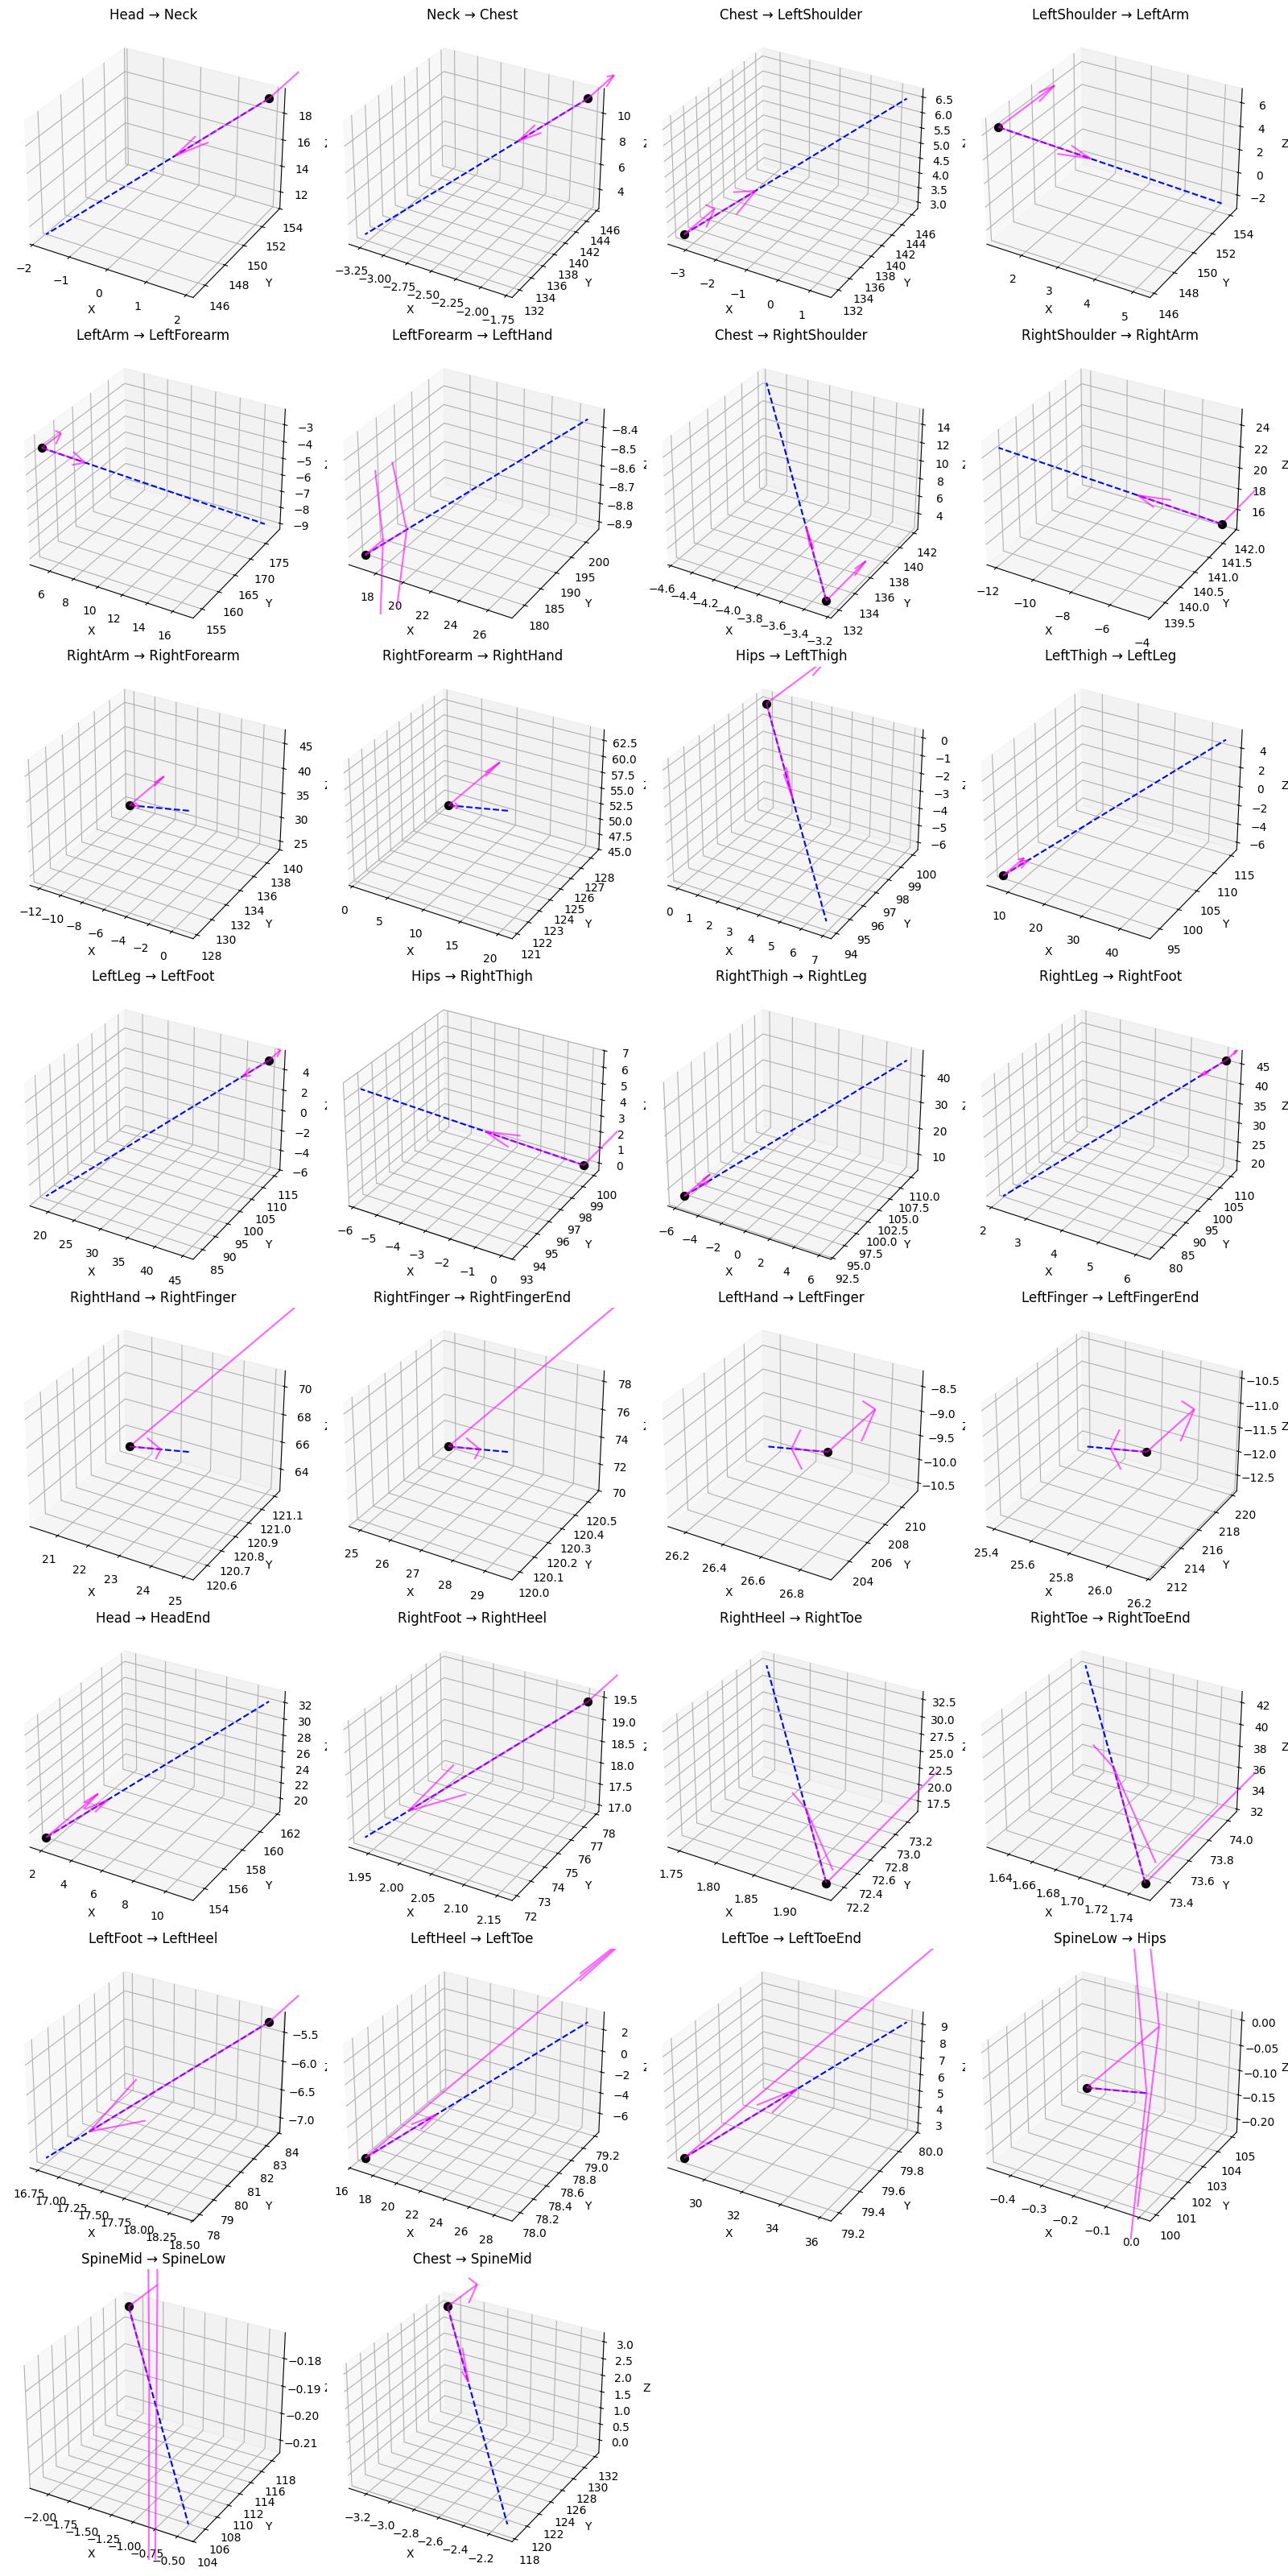

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pyquaternion import Quaternion
import math

# ----------------------------
# Assumed to be already defined in your environment:
# kp3d : (N, 3) numpy array of 3D joint positions.
# joint_order : list of joint names in the same order as kp3d.
# Skeleton connectivity is defined as a list of joint name pairs.
conns = [
    ('Head', 'Neck'), ('Neck', 'Chest'), ('Chest', 'LeftShoulder'), ('LeftShoulder', 'LeftArm'),
    ('LeftArm', 'LeftForearm'), ('LeftForearm', 'LeftHand'), ('Chest', 'RightShoulder'),
    ('RightShoulder', 'RightArm'), ('RightArm', 'RightForearm'), ('RightForearm', 'RightHand'),
    ('Hips', 'LeftThigh'), ('LeftThigh', 'LeftLeg'), ('LeftLeg', 'LeftFoot'),
    ('Hips', 'RightThigh'), ('RightThigh', 'RightLeg'), ('RightLeg', 'RightFoot'),
    ('RightHand', 'RightFinger'), ('RightFinger', 'RightFingerEnd'),
    ('LeftHand', 'LeftFinger'), ('LeftFinger', 'LeftFingerEnd'),
    ('Head', 'HeadEnd'), ('RightFoot', 'RightHeel'), ('RightHeel', 'RightToe'),
    ('RightToe', 'RightToeEnd'), ('LeftFoot', 'LeftHeel'), ('LeftHeel', 'LeftToe'),
    ('LeftToe', 'LeftToeEnd'), ('SpineLow', 'Hips'), ('SpineMid', 'SpineLow'),
    ('Chest', 'SpineMid')
]

# Default limb direction (canonical direction)
default_vector = np.array([0, 1, 0])

# ----------------------------
# Helper function: Compute the quaternion that rotates v0 to v1.
def quaternion_from_vectors(v0, v1):
    v0_norm = v0 / np.linalg.norm(v0)
    v1_norm = v1 / np.linalg.norm(v1)
    dot = np.dot(v0_norm, v1_norm)
    # If nearly identical, return the identity quaternion.
    if dot >= 0.9999:
        return Quaternion()
    # If nearly opposite, choose an arbitrary perpendicular axis.
    if dot <= -0.9999:
        orthog = np.array([1, 0, 0])
        if np.abs(v0_norm[0]) > 0.9:
            orthog = np.array([0, 1, 0])
        axis = np.cross(v0_norm, orthog)
        axis /= np.linalg.norm(axis)
        return Quaternion(axis=axis, angle=np.pi)
    axis = np.cross(v0_norm, v1_norm)
    angle = np.arccos(dot)
    return Quaternion(axis=axis, angle=angle)

# ----------------------------
# Compute limb quaternions for each connection.
limb_quaternions = {}  # key: (joint1, joint2), value: computed quaternion.
for j1, j2 in conns:
    if j1 in joint_order and j2 in joint_order:
        i1, i2 = joint_order.index(j1), joint_order.index(j2)
        limb_vector = kp3d[i2] - kp3d[i1]
        if np.linalg.norm(limb_vector) < 1e-6:
            q = Quaternion()  # Identity quaternion.
        else:
            q = quaternion_from_vectors(default_vector, limb_vector)
        limb_quaternions[(j1, j2)] = q

# ----------------------------
# Perform SLERP interpolation for all connections.
# For each connection, we interpolate from the identity quaternion to the computed limb quaternion.
n_interp = 2  # number of interpolation steps
n_connections = len(limb_quaternions)
ncols = 4  # number of subplot columns
nrows = math.ceil(n_connections / ncols)

fig_interp, axes_interp = plt.subplots(nrows, ncols, subplot_kw={'projection': '3d'}, figsize=(4*ncols, 4*nrows))
axes_interp = axes_interp.flatten()  # Flatten for easy iteration

for idx, ((j1, j2), q_end) in enumerate(limb_quaternions.items()):
    ax = axes_interp[idx]
    # Base point for this connection is the first joint.
    i1 = joint_order.index(j1)
    base_point = kp3d[i1]
    # Identity quaternion as start.
    q_start = Quaternion()
    # Compute interpolated quaternions.
    interp_quats = [Quaternion.slerp(q_start, q_end, i/(n_interp-1)) for i in range(n_interp)]
    
    # Plot base joint.
    ax.scatter(base_point[0], base_point[1], base_point[2], color='k', s=50)
    # Optionally, draw the connection as a dashed line.
    i2 = joint_order.index(j2)
    ax.plot([kp3d[i1, 0], kp3d[i2, 0]],
            [kp3d[i1, 1], kp3d[i2, 1]],
            [kp3d[i1, 2], kp3d[i2, 2]], color='blue', linestyle='--')
    
    # Plot the interpolated arrows.
    for iq in interp_quats:
        rotated_dir = iq.rotate(default_vector)
        ax.quiver(base_point[0], base_point[1], base_point[2],
                  rotated_dir[0], rotated_dir[1], rotated_dir[2],
                  length=5, color='magenta', alpha=0.6)
    
    ax.set_title(f"{j1} → {j2}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

# Hide any extra subplots (if any)
for j in range(idx+1, len(axes_interp)):
    fig_interp.delaxes(axes_interp[j])

plt.tight_layout()
plt.show()

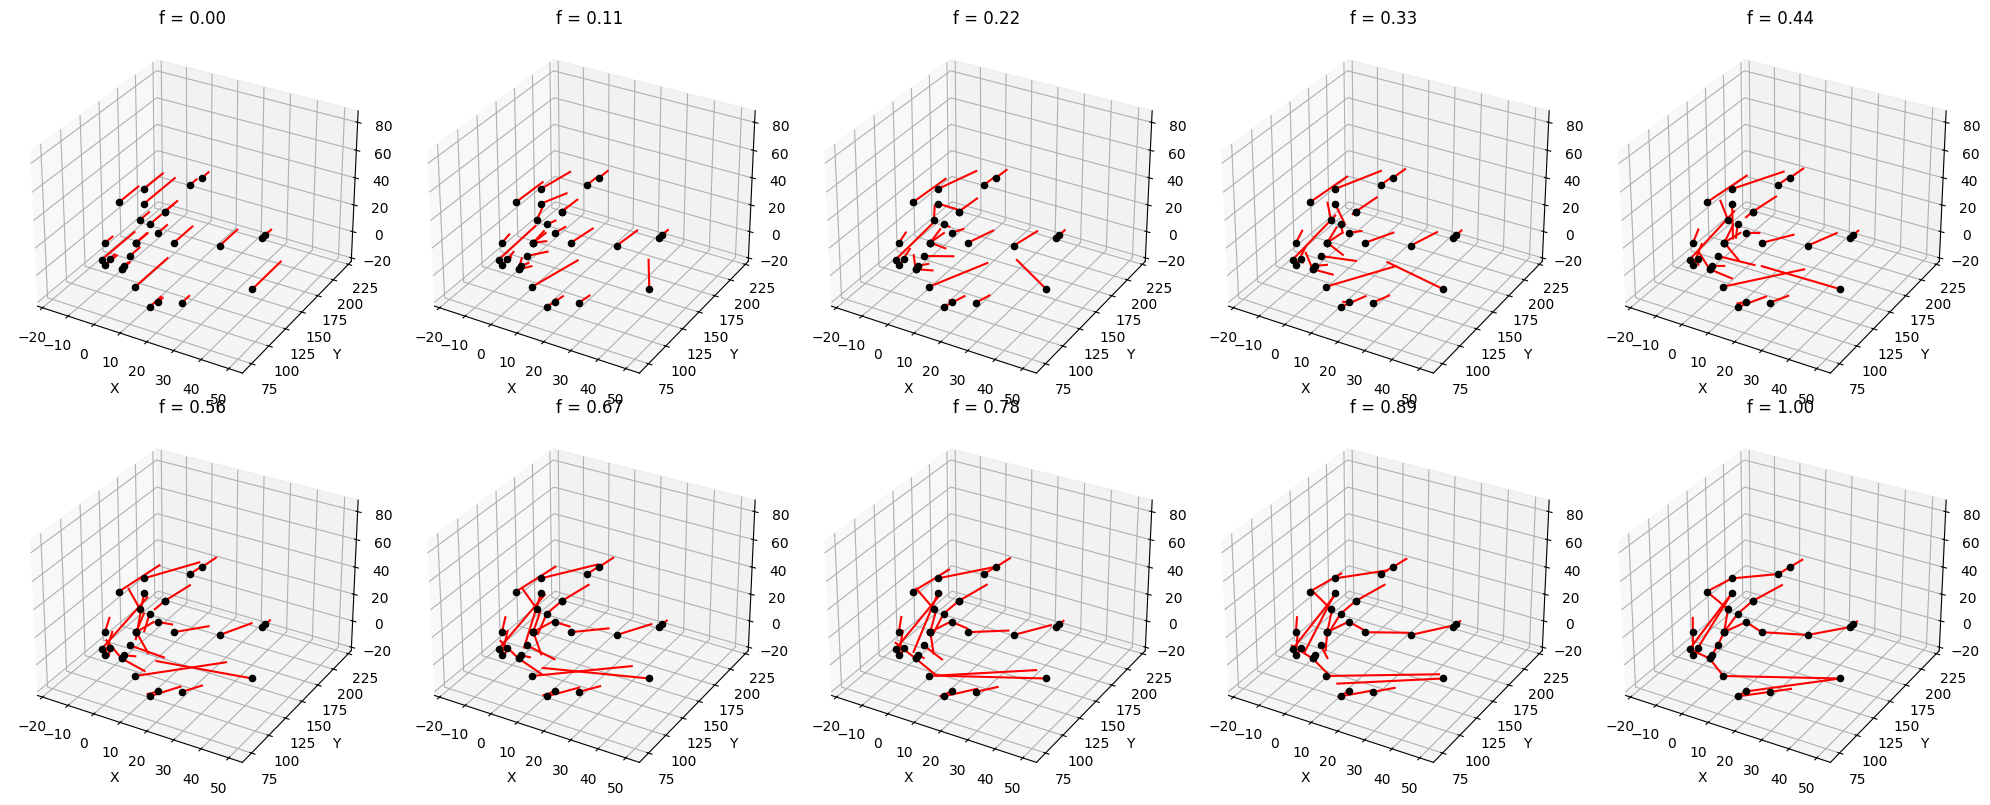

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pyquaternion import Quaternion
import math

# ----------------------------
# Assumed variables:
# kp3d: numpy array of shape (N,3) representing the 3D joint positions.
# joint_order: list of joint names corresponding to the kp3d ordering.
# Define your skeleton connectivity as a list of joint name pairs.
conns = [
    ('Head', 'Neck'), ('Neck', 'Chest'), ('Chest', 'LeftShoulder'), ('LeftShoulder', 'LeftArm'),
    ('LeftArm', 'LeftForearm'), ('LeftForearm', 'LeftHand'), ('Chest', 'RightShoulder'),
    ('RightShoulder', 'RightArm'), ('RightArm', 'RightForearm'), ('RightForearm', 'RightHand'),
    ('Hips', 'LeftThigh'), ('LeftThigh', 'LeftLeg'), ('LeftLeg', 'LeftFoot'),
    ('Hips', 'RightThigh'), ('RightThigh', 'RightLeg'), ('RightLeg', 'RightFoot'),
    ('RightHand', 'RightFinger'), ('RightFinger', 'RightFingerEnd'),
    ('LeftHand', 'LeftFinger'), ('LeftFinger', 'LeftFingerEnd'),
    ('Head', 'HeadEnd'), ('RightFoot', 'RightHeel'), ('RightHeel', 'RightToe'),
    ('RightToe', 'RightToeEnd'), ('LeftFoot', 'LeftHeel'), ('LeftHeel', 'LeftToe'),
    ('LeftToe', 'LeftToeEnd'), ('SpineLow', 'Hips'), ('SpineMid', 'SpineLow'),
    ('Chest', 'SpineMid')
]

# Default limb direction: assume in the canonical (default) pose all limbs point upward.
default_vector = np.array([0, 1, 0])

# ----------------------------
# Helper function: compute the quaternion that rotates v0 to v1.
def quaternion_from_vectors(v0, v1):
    v0_norm = v0 / np.linalg.norm(v0)
    v1_norm = v1 / np.linalg.norm(v1)
    dot = np.dot(v0_norm, v1_norm)
    if dot >= 0.9999:
        return Quaternion()  # Identity quaternion.
    if dot <= -0.9999:
        # Pick an arbitrary perpendicular axis.
        orthog = np.array([1, 0, 0])
        if np.abs(v0_norm[0]) > 0.9:
            orthog = np.array([0, 1, 0])
        axis = np.cross(v0_norm, orthog)
        axis /= np.linalg.norm(axis)
        return Quaternion(axis=axis, angle=np.pi)
    axis = np.cross(v0_norm, v1_norm)
    angle = np.arccos(dot)
    return Quaternion(axis=axis, angle=angle)

# ----------------------------
# Compute the target quaternion and limb length for each connection.
# We'll store for each connection a tuple: (target quaternion, limb length, base joint position)
limb_targets = {}
for j1, j2 in conns:
    if j1 in joint_order and j2 in joint_order:
        i1, i2 = joint_order.index(j1), joint_order.index(j2)
        base = kp3d[i1]
        target_vector = kp3d[i2] - kp3d[i1]
        limb_length = np.linalg.norm(target_vector)
        if limb_length < 1e-6:
            q_target = Quaternion()
        else:
            q_target = quaternion_from_vectors(default_vector, target_vector)
        limb_targets[(j1, j2)] = (q_target, limb_length, base)

# ----------------------------
# Define number of interpolation steps.
n_interp = 10

# We'll generate a collective skeleton pose for each interpolation fraction f.
# At f = 0, every limb is in its default orientation.
# At f = 1, every limb has reached its target orientation.
poses = []  # Each pose is a dictionary mapping connection -> (base, end_point)
for step in range(n_interp):
    f = step / (n_interp - 1)
    pose = {}
    for conn, (q_target, limb_length, base) in limb_targets.items():
        # Interpolate from identity to target quaternion.
        q_interp = Quaternion.slerp(Quaternion(), q_target, f)
        # Rotate the default vector and scale by the limb length.
        rotated_dir = q_interp.rotate(default_vector)
        end_point = base + rotated_dir * limb_length
        pose[conn] = (base, end_point)
    poses.append(pose)

# ----------------------------
# Plot the entire skeleton collectively for each interpolation step.
ncols = 5
nrows = math.ceil(n_interp / ncols)
fig, axes = plt.subplots(nrows, ncols, subplot_kw={'projection': '3d'}, figsize=(4*ncols, 4*nrows))
axes = axes.flatten()

# Determine plot limits based on kp3d.
x_min, x_max = np.min(kp3d[:,0])-10, np.max(kp3d[:,0])+10
y_min, y_max = np.min(kp3d[:,1])-10, np.max(kp3d[:,1])+10
z_min, z_max = np.min(kp3d[:,2])-10, np.max(kp3d[:,2])+10

for step in range(n_interp):
    f = step / (n_interp - 1)
    ax = axes[step]
    # For each connection, plot the limb.
    for (j1, j2), (base, end_point) in poses[step].items():
        ax.plot([base[0], end_point[0]],
                [base[1], end_point[1]],
                [base[2], end_point[2]], color='red')
        # Optionally, mark the base joint.
        ax.scatter(base[0], base[1], base[2], color='black', s=20)
    ax.set_title(f"f = {f:.2f}")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_zlim(z_min, z_max)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

# Remove any unused subplots.
for j in range(n_interp, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

2025-04-01 06:06:57,486 - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2025-04-01 06:06:57,488 - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 800x600 -pix_fmt rgba -framerate 15 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -b 1800k -metadata 'artist=Your Name' -y kp3d_skeleton_quaternion_rotation.mp4


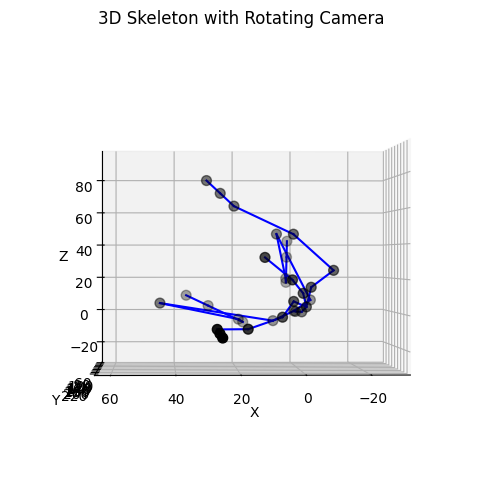

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pyquaternion import Quaternion
import matplotlib.animation as animation

# ----------------------------
# Assumed variables (should be defined in your environment):
# kp3d: numpy array of shape (N, 3) with the 3D keypoint positions.
# joint_order: list of joint names corresponding to the rows of kp3d.
# Skeleton connectivity (for plotting connections):
conns = [
    ('Head', 'Neck'), ('Neck', 'Chest'), ('Chest', 'LeftShoulder'), ('LeftShoulder', 'LeftArm'),
    ('LeftArm', 'LeftForearm'), ('LeftForearm', 'LeftHand'), ('Chest', 'RightShoulder'),
    ('RightShoulder', 'RightArm'), ('RightArm', 'RightForearm'), ('RightForearm', 'RightHand'),
    ('Hips', 'LeftThigh'), ('LeftThigh', 'LeftLeg'), ('LeftLeg', 'LeftFoot'),
    ('Hips', 'RightThigh'), ('RightThigh', 'RightLeg'), ('RightLeg', 'RightFoot'),
    ('RightHand', 'RightFinger'), ('RightFinger', 'RightFingerEnd'),
    ('LeftHand', 'LeftFinger'), ('LeftFinger', 'LeftFingerEnd'),
    ('Head', 'HeadEnd'), ('RightFoot', 'RightHeel'), ('RightHeel', 'RightToe'),
    ('RightToe', 'RightToeEnd'), ('LeftFoot', 'LeftHeel'), ('LeftHeel', 'LeftToe'),
    ('LeftToe', 'LeftToeEnd'), ('SpineLow', 'Hips'), ('SpineMid', 'SpineLow'),
    ('Chest', 'SpineMid')
]

# ----------------------------
# Compute the skeleton center (to be kept fixed in the center of the view)
center = np.mean(kp3d, axis=0)
margin = 20
x_min, x_max = np.min(kp3d[:,0]) - margin, np.max(kp3d[:,0]) + margin
y_min, y_max = np.min(kp3d[:,1]) - margin, np.max(kp3d[:,1]) + margin
z_min, z_max = np.min(kp3d[:,2]) - margin, np.max(kp3d[:,2]) + margin

# ----------------------------
# Define a default camera vector relative to the center.
# For example, we place the camera d units away along the x-axis.
d = 200
default_cam = np.array([d, 0, 0])  # initial offset from the center

# ----------------------------
# Set up the figure and 3D axes.
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the skeleton (keypoints and connections)
def plot_skeleton():
    ax.clear()
    # Plot keypoints
    ax.scatter(kp3d[:, 0], kp3d[:, 1], kp3d[:, 2], color='k', s=50)
    # Plot connections
    for j1, j2 in conns:
        if j1 in joint_order and j2 in joint_order:
            i1, i2 = joint_order.index(j1), joint_order.index(j2)
            ax.plot([kp3d[i1, 0], kp3d[i2, 0]],
                    [kp3d[i1, 1], kp3d[i2, 1]],
                    [kp3d[i1, 2], kp3d[i2, 2]], color='blue')
    # Set plot limits and labels
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_zlim(z_min, z_max)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title("3D Skeleton with Rotating Camera")

# ----------------------------
# Update function for animation.
def update(frame):
    # Use pyquaternion to rotate the camera vector around the Y-axis.
    # Here, 'frame' is in degrees; convert to radians.
    angle_rad = np.deg2rad(frame)
    # Create the rotation quaternion (rotating around the Y-axis).
    q_rot = Quaternion(axis=[0, 1, 0], angle=angle_rad)
    # Compute new camera position relative to center.
    cam_pos = center + q_rot.rotate(default_cam)
    
    # Compute spherical coordinates from cam_pos relative to center.
    rel = cam_pos - center
    r = np.linalg.norm(rel)
    # Elevation: angle between the vector and the horizontal plane.
    elev = np.degrees(np.arcsin(rel[1] / r))
    # Azimuth: angle in the horizontal (x-z) plane.
    azim = np.degrees(np.arctan2(rel[0], rel[2]))
    
    # Update the view with the computed azimuth and elevation.
    ax.view_init(elev=elev, azim=azim)
    plot_skeleton()
    return fig,

# Create the animation: rotate from 0 to 360 degrees.
ani = animation.FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=50, blit=False)

# Optionally, save the animation as an MP4 video (requires ffmpeg).
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Your Name'), bitrate=1800)
ani.save("kp3d_skeleton_quaternion_rotation.mp4", writer=writer)

plt.show()

2025-04-01 06:08:45,327 - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2025-04-01 06:08:45,328 - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 800x600 -pix_fmt rgba -framerate 15 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -b 1800k -metadata 'artist=Your Name' -y kp3d_skeleton_quaternion_elevated_rotation.mp4


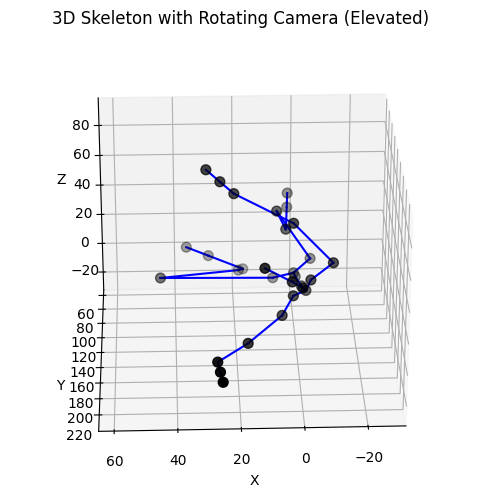

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pyquaternion import Quaternion
import matplotlib.animation as animation

# ----------------------------
# Assumed variables:
# kp3d : numpy array of shape (N, 3) representing your 3D keypoints.
# joint_order : list of joint names corresponding to kp3d.
# Skeleton connectivity (list of tuples for connected joints):
conns = [
    ('Head', 'Neck'), ('Neck', 'Chest'), ('Chest', 'LeftShoulder'), ('LeftShoulder', 'LeftArm'),
    ('LeftArm', 'LeftForearm'), ('LeftForearm', 'LeftHand'), ('Chest', 'RightShoulder'),
    ('RightShoulder', 'RightArm'), ('RightArm', 'RightForearm'), ('RightForearm', 'RightHand'),
    ('Hips', 'LeftThigh'), ('LeftThigh', 'LeftLeg'), ('LeftLeg', 'LeftFoot'),
    ('Hips', 'RightThigh'), ('RightThigh', 'RightLeg'), ('RightLeg', 'RightFoot'),
    ('RightHand', 'RightFinger'), ('RightFinger', 'RightFingerEnd'),
    ('LeftHand', 'LeftFinger'), ('LeftFinger', 'LeftFingerEnd'),
    ('Head', 'HeadEnd'), ('RightFoot', 'RightHeel'), ('RightHeel', 'RightToe'),
    ('RightToe', 'RightToeEnd'), ('LeftFoot', 'LeftHeel'), ('LeftHeel', 'LeftToe'),
    ('LeftToe', 'LeftToeEnd'), ('SpineLow', 'Hips'), ('SpineMid', 'SpineLow'),
    ('Chest', 'SpineMid')
]

# ----------------------------
# Compute the center of the skeleton.
center = np.mean(kp3d, axis=0)
margin = 20
x_min, x_max = np.min(kp3d[:,0]) - margin, np.max(kp3d[:,0]) + margin
y_min, y_max = np.min(kp3d[:,1]) - margin, np.max(kp3d[:,1]) + margin
z_min, z_max = np.min(kp3d[:,2]) - margin, np.max(kp3d[:,2]) + margin

# ----------------------------
# Define a default camera offset relative to the skeleton center.
# Here, we set an offset that is 200 units along the X-axis and 100 units elevated along Y.
default_cam = np.array([200, 100, 0])

# ----------------------------
# Set up the figure and 3D axes.
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

def plot_skeleton():
    """Clear and replot the skeleton keypoints and connections."""
    ax.clear()
    # Plot keypoints.
    ax.scatter(kp3d[:, 0], kp3d[:, 1], kp3d[:, 2], color='k', s=50)
    # Plot connections.
    for j1, j2 in conns:
        if j1 in joint_order and j2 in joint_order:
            i1, i2 = joint_order.index(j1), joint_order.index(j2)
            ax.plot([kp3d[i1, 0], kp3d[i2, 0]],
                    [kp3d[i1, 1], kp3d[i2, 1]],
                    [kp3d[i1, 2], kp3d[i2, 2]], color='blue')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_zlim(z_min, z_max)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title("3D Skeleton with Rotating Camera (Elevated)")

# ----------------------------
# Update function for the animation.
def update(frame):
    # Frame (in degrees) is converted to radians.
    angle_rad = np.deg2rad(frame)
    # Create a rotation quaternion about the Y-axis.
    q_rot = Quaternion(axis=[0, 1, 0], angle=angle_rad)
    # Rotate the default camera offset using the quaternion.
    cam_pos = center + q_rot.rotate(default_cam)
    
    # Compute relative position and extract spherical view angles.
    rel = cam_pos - center
    r = np.linalg.norm(rel)
    elev = np.degrees(np.arcsin(rel[1] / r))  # remains constant if Y is constant.
    azim = np.degrees(np.arctan2(rel[0], rel[2]))
    
    # Update view based on computed azimuth and elevation.
    ax.view_init(elev=elev, azim=azim)
    plot_skeleton()
    return fig,

# Create the animation: rotate from 0 to 360 degrees.
ani = animation.FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=50, blit=False)

# Optionally, save the animation as an MP4 video (requires ffmpeg installed).
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Your Name'), bitrate=1800)
ani.save("kp3d_skeleton_quaternion_elevated_rotation.mp4", writer=writer)

plt.show()